<a href="https://colab.research.google.com/github/svhenrique/ufal/blob/main/RN/mrnls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#**Universidade Federal de Alagoas - UFAL**

# **Ciência da Computação**

## Redes Neurais

## **Modelos de Redes Neurais e Linguagem de Sinais**

</center>

Observação: Por conveniencia, usarei o formato American Sign Language (ASL).

# Preparando o ambiente

## Lendo dados

In [1]:
# montando drive (para o colab)
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Importando bibliotecas


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
import os

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Preparando dados

## Lendo dados

In [3]:
file = os.path.join("drive", "MyDrive", "datasets", "sign-language", "sign_mnist_train", "sign_mnist_train.csv")
df = pd.read_csv(file)

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# Separando em X e y
X = df.drop(columns='label')
y = df["label"]

## Analisando dados

In [6]:
# mostrando shape
X.shape

(27455, 784)



*   Como cada um dos 784 valores representa um pixel, então esse dataset contém imagens com resolução 28x28.
*   É necessário converter o shape do dataset para 27566x28x28



In [7]:
# mostrando informações estatísticas dos dados
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


*   Pixels vão de 0 a 255 de intensidade.
*   Existem 25 labels no total, indo de 0 a 25.



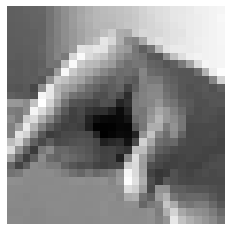

In [8]:
# scrip para mostrar exemplo de imagem
r = random.randint(0, 21964)
arr = np.array(X)
some_value = arr[r]
some_img = some_value.reshape(28,28)
plt.imshow(some_img, cmap="gray")
plt.axis("off")
plt.show()  

## Organizando dados



*   Converter a forma de representação de X e y é necessário para o uso na biblioteca Keras.
*   X deve ter o shape (27455, 28, 28, 1).
*   y deve ter o shape (27455, 24).




In [9]:
# O valor de X teve seu shape mudado para 28, 28,1
# e o valor de y agora apresenta saídas vetorizadas
X_r = pd.DataFrame(X).values.reshape(X.shape[0] ,28, 28, 1)
y_r = pd.get_dummies(y)

In [10]:
print(f"X_r: {X_r.shape}")
print(f"y_r: {y_r.shape}")

X_r: (27455, 28, 28, 1)
y_r: (27455, 24)


# Criando modelos

## scikit-learn

Será usado uma Rede Neural Multi-Layer Perceptron (MLP) com otimização de parâmetros Randomized Search



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [13]:
param_grid = [
              {
                  'hidden_layer_sizes': [(100), (100, 100), (100, 100, 100), (200, 200, 200), (250, 250, 250)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [200,500,1000]
              }
              
]

In [15]:
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [16]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions=[{'activation': ['identity', 'logistic',
                                                        'tanh', 'relu'],
                                         'hidden_layer_sizes': [100, (100, 100),
                                                                (100, 100, 100),
                                                                (200, 200, 200),
                                                                (250, 250,
                                                                 250)],
                                         'max_iter': [200, 500, 1000],
                                         'solver': ['lbfgs', 'sgd', 'adam']}],
                   scoring='accuracy')

In [17]:
print(mlp.best_params_)

{'solver': 'lbfgs', 'max_iter': 200, 'hidden_layer_sizes': (200, 200, 200), 'activation': 'relu'}


In [18]:
print(round(mlp.best_score_,3))

0.902


### Keras